<a href="https://colab.research.google.com/github/1ZeroStorm/Machine_Learning_Projects/blob/main/Machine_Learning_Projects/SupportVectorMachine/SupportVectorMachine_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
df = pd.DataFrame(iris.data, columns = iris['feature_names'])
df['target'] = iris.target
df['flower_names'] = df.target.apply(lambda x: iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [ ]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


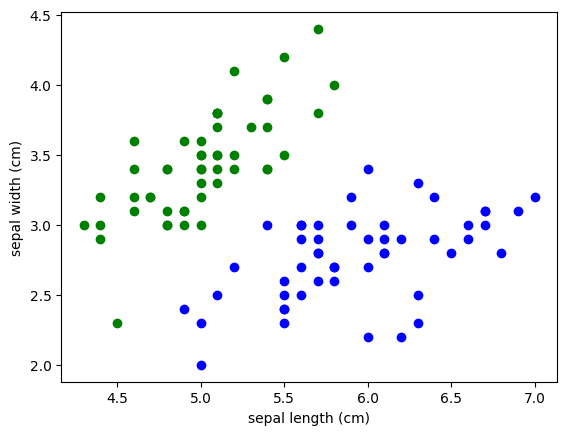

Text(0, 0.5, 'petal width (cm)')

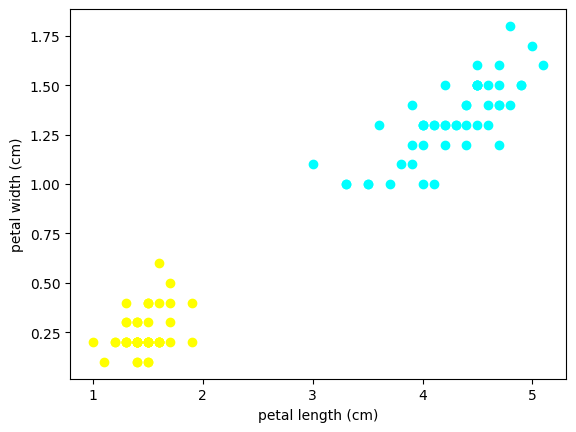

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color= 'green')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color= 'blue')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color= 'yellow')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color= 'cyan')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [ ]:
X = df.drop(['target', 'flower_names'], axis = 1)
y = df.target


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.svm import SVC
model = SVC(C = 10)
model.fit(X_train, y_train)

SVC(C=10)

In [ ]:
model.score(X_test, y_test)

0.9666666666666667

# full code


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
%matplotlib inline

# load data and add flower_names column, merge all data
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris['feature_names'])
df['target'] = iris.target
df['flower_names'] = df.target.apply(lambda x: iris.target_names[x])

# classify all the rows according to the flower type
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]
df0.head()

# plotting so that can get an image of classification
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color= 'green')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color= 'blue')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color= 'yellow')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color= 'cyan')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

# dependent and independent variable declaration
X = df.drop(['target', 'flower_names'], axis = 1)
y = df.target

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#fit model
model = SVC(C = 10)
model.fit(X_train, y_train)

#predict model
model.score(X_test, y_test)


# exercise

In [ ]:
from sklearn.datasets import load_digits
import pandas as pd

digits = load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


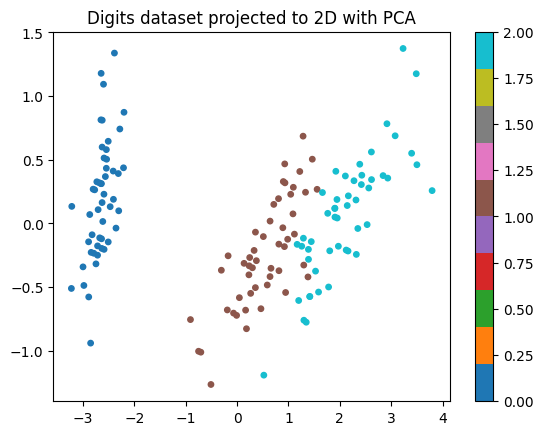

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', s=15)
plt.colorbar()
plt.title("Digits dataset projected to 2D with PCA")
plt.show()


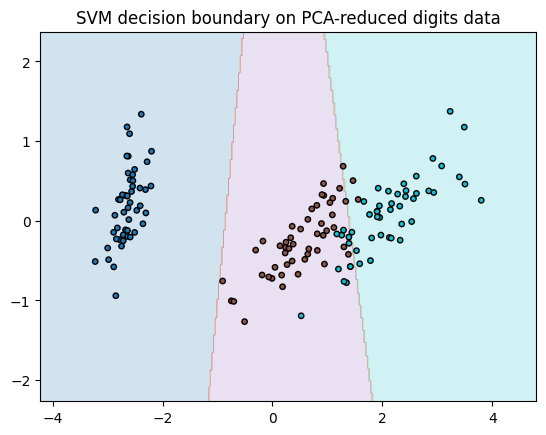

In [ ]:
model_2d = SVC(kernel='rbf', gamma=0.001)
model_2d.fit(X_pca, y)

# Create grid
import numpy as np
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap='tab10')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', s=15, edgecolors='k')
plt.title("SVM decision boundary on PCA-reduced digits data")
plt.show()


In [ ]:
X = digits.data
y = digits.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel = 'rbf', gamma='scale', )
model.fit(X_train, y_train)

SVC()

In [ ]:
model.score(X_test, y_test)

0.9972222222222222

In [ ]:
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}